# <Span style="color:#134f5c"> TRIDENT1 - Feature Selection - Czerwiec 2020 ['census-income.data']

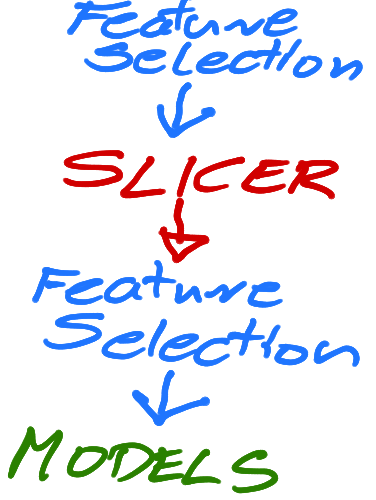

In [1]:
headers = ['age','class_of_worker','industry_code','adjusted_gross_income','education','wage_per_hour','enrolled_in_edu_inst_last_wk','marital_status','major_industry_code','major_occupation_code','mace','hispanic_Origin','sex','member_of_a_labor_union','reason_for_unemployment','full_or_part_time_employment_stat','capital_gains','capital_losses','divdends_from_stocks','federal_income_tax_liability','tax_filer_status','region_of_previous_residence','state_of_previous_residence','detailed_household_and_family_stat','detailed_household_summary_in_household','instance_weight', 'migration_code_change_in_msa','migration_code_change_in_reg','migration_code_move_within_reg','live_in_this_house_1year_ ago','migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer','family_members_under_18', 'total_person_earnings','country_of_birth_father', 'country_of_birth_mother','country_of_birth_self', 'citizenship','total_person_income', 'own_business_or_self_employed','taxable_income_amount','fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 'weeks_worked_in_year']

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/8/census-income.data',header=None, names=headers)
print(df.shape)
print()
print(df.columns)
df.head(3)

(199523, 44)

Index(['age', 'class_of_worker', 'industry_code', 'adjusted_gross_income',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'mace', 'hispanic_Origin', 'sex', 'member_of_a_labor_union',
       'reason_for_unemployment', 'full_or_part_time_employment_stat',
       'capital_gains', 'capital_losses', 'divdends_from_stocks',
       'federal_income_tax_liability', 'tax_filer_status',
       'region_of_previous_residence', 'state_of_previous_residence',
       'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'instance_weight',
       'migration_code_change_in_msa', 'migration_code_change_in_reg',
       'migration_code_move_within_reg', 'live_in_this_house_1year_ ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_members_under_18', 'total_person_earnings',
       'country_of_birth_father', 'country

,age,class_of_worker,industry_code,adjusted_gross_income,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,total_person_income,own_business_or_self_employed,taxable_income_amount,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.,NaN,NaN
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.,NaN,NaN
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.,NaN,NaN


### <span style="color:green"> Kasuje bezsensowne kolumny

In [3]:
del df['veterans_benefits']
del df['weeks_worked_in_year']

### <span style="color:green"> Wielkość bazy df jest ogromna - wyciągam tylko 1% losowo wybranych rekordów</span> 
Taka metoda jest najbardziej reprezentatywna i oszczędza zasoby komputera.

In [4]:
df2 = df.sample(frac = 0.50, random_state=148)
df2.shape

(99762, 42)

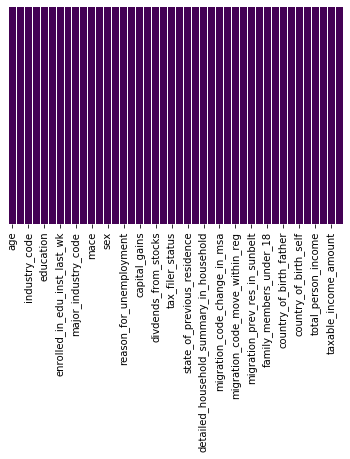

In [5]:
import seaborn as sns

sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## <span style="color:green"> Wyświetlenie braków </span>  (własnej roboty)

In [6]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df2.columns[i]
    r = df2[i].isnull().sum()
    h = df2[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------


## <span style="color:green"> Nie warto kasować rekordów z brakami tylko warto wstawiać tam wartości z poza zakresu </span>

Wyszukuje tylko puste rekordy

In [7]:
null_value_stats = df2.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

Wstawia w puste miejsca wartości z poza zakresu

In [8]:
df2.fillna(7777, inplace=True)

## <span style="color:green"> Przegląd danych pod kontem formatu i ilości wartości unikalnych</span>  (własnej roboty)

In [9]:
a,b = df2.shape     #<- ile mamy kolumn
b

import numpy as np

for i in range(1,b):
    i = df2.columns[i]
    h = df2[i].nunique()
    f = df2[i].dtypes
          
    print(f,'---nunique->',h,'---name->', i)

object ---nunique-> 9 ---name-> class_of_worker
int64 ---nunique-> 52 ---name-> industry_code
int64 ---nunique-> 47 ---name-> adjusted_gross_income
object ---nunique-> 17 ---name-> education
int64 ---nunique-> 909 ---name-> wage_per_hour
object ---nunique-> 3 ---name-> enrolled_in_edu_inst_last_wk
object ---nunique-> 7 ---name-> marital_status
object ---nunique-> 24 ---name-> major_industry_code
object ---nunique-> 15 ---name-> major_occupation_code
object ---nunique-> 5 ---name-> mace
object ---nunique-> 10 ---name-> hispanic_Origin
object ---nunique-> 2 ---name-> sex
object ---nunique-> 3 ---name-> member_of_a_labor_union
object ---nunique-> 6 ---name-> reason_for_unemployment
object ---nunique-> 8 ---name-> full_or_part_time_employment_stat
int64 ---nunique-> 127 ---name-> capital_gains
int64 ---nunique-> 110 ---name-> capital_losses
int64 ---nunique-> 1121 ---name-> divdends_from_stocks
object ---nunique-> 6 ---name-> federal_income_tax_liability
object ---nunique-> 6 ---name-> tax

## <span style="color:green"> Które z tych funkcji są kategoryczne?</span> (własnej roboty)

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 10 unikalnych wartości

In [10]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    h = df2[i].nunique()
    
    if f == np.object or h<=10:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
class_of_worker --- object --- 9
education --- object --- 17
enrolled_in_edu_inst_last_wk --- object --- 3
marital_status --- object --- 7
major_industry_code --- object --- 24
major_occupation_code --- object --- 15
mace --- object --- 5
hispanic_Origin --- object --- 10
sex --- object --- 2
member_of_a_labor_union --- object --- 3
reason_for_unemployment --- object --- 6
full_or_part_time_employment_stat --- object --- 8
federal_income_tax_liability --- object --- 6
tax_filer_status --- object --- 6
region_of_previous_residence --- object --- 51
state_of_previous_residence --- object --- 37
detailed_household_and_family_stat --- object --- 8
instance_weight --- object --- 10
migration_code_change_in_msa --- object --- 9
migration_code_change_in_reg --- object --- 10
migration_code_move_within_reg --- object --- 3
live_in_this_house_1year_ ago --- object --- 4
migration_prev_res_in_sunbelt --- int64 --- 7
num_persons_worked_for_employer --

#### Potrzebujemy listy z numerami kolumnaby użyć jej w CatBoost¶

In [11]:
import numpy as np
a,b = df2.shape     #<- ile mamy kolumn
b

print()
categorical_fun = np.where((df2.dtypes == np.object)|(df2.nunique() <= 15))[0]
x1 = len(categorical_fun)
print('categorical_fun: ',x1)
print('categorical_fun: ',categorical_fun)
print()
numerical_fun = np.where((df2.dtypes != np.object)&(df2.nunique() > 15))[0]
x2 = len(numerical_fun)
print('numerical_fun: ',x2)
print('numerical_fun: ',numerical_fun)
print()
print('LICZBA KOLUMN MA SIĘ ZGADZAĆ!')
print('all columns:                     ',b)
print('numerical_fun + categorical_fun: ',x1+x2)


categorical_fun:  33
categorical_fun:  [ 1  4  6  7  8  9 10 11 12 13 14 15 19 20 21 22 23 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 40 41]

numerical_fun:  9
numerical_fun:  [ 0  2  3  5 16 17 18 24 39]

LICZBA KOLUMN MA SIĘ ZGADZAĆ!
all columns:                      42
numerical_fun + categorical_fun:  42


## <span style="color:red"> Uwaga! 
#### <span style="color:red">    1. dane categorialne nie muszą mieć tylko formatu tekstowego, 

#### <span style="color:red">    2. dane tekstowe trzeba przerobić do formatu numerycznego 

### <span style="color:green"> Narzędzie do automatycznego kodowania zmiennych dyskretnych </span>(własnej roboty)


In [12]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df2[i] = pd.Categorical(df2[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
class_of_worker --- object
education --- object
enrolled_in_edu_inst_last_wk --- object
marital_status --- object
major_industry_code --- object
major_occupation_code --- object
mace --- object
hispanic_Origin --- object
sex --- object
member_of_a_labor_union --- object
reason_for_unemployment --- object
full_or_part_time_employment_stat --- object
federal_income_tax_liability --- object
tax_filer_status --- object
region_of_previous_residence --- object
state_of_previous_residence --- object
detailed_household_and_family_stat --- object
instance_weight --- object
migration_code_change_in_msa --- object
migration_code_change_in_reg --- object
migration_code_move_within_reg --- object
live_in_this_house_1year_ ago --- object
num_persons_worked_for_employer --- object
family_members_under_18 --- object
total_person_earnings --- object
country_of_birth_father --- object
country_of_birth_mother --- object
citizenship --- object
fill_inc_que

### <span style="color:green"> Narzędzie do automatycznej zmiany znaku na plus </span>(własnej roboty)

In [13]:
df2.head()

,age,class_of_worker,industry_code,adjusted_gross_income,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,family_members_under_18,total_person_earnings,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,total_person_income,own_business_or_self_employed,taxable_income_amount,fill_inc_questionnaire_for_veterans_admin
26938,59,4,41,23,12,1200,2,2,9,0,...,40,40,40,4,0,1,2,52,95,0
13699,33,4,25,42,12,0,2,4,11,4,...,40,40,40,4,0,1,2,0,94,0
166169,78,3,0,0,2,0,2,4,14,6,...,22,22,22,1,0,1,2,0,95,0
149902,36,4,36,27,3,0,2,4,17,9,...,8,8,8,0,1,1,2,52,95,0
107971,6,3,0,0,10,0,2,4,14,6,...,40,40,40,4,0,1,0,0,95,0


### <span style="color:green">Szukamy ujemnych wartości i je zmieniamy (przesuwamy) aby były dodatnie
Filtr Ch2 nie lubi ujemnych wartości

In [14]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('NEGATIVE VALUES')
print('---------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].min()
    if f < 0: 
        print(i,"---",f)

NEGATIVE VALUES
---------------


#### Najpierw trzeba się upewnić czy ujemna wartość to nie jest ewidentny błąd

#### usuwamy wartości ujemne (przesuwamy)

In [15]:
#df2['Age_In_Day'] = df2['Age_In_Day']+(-df2['Age_In_Day'].min())
#df2['cons_conf_idx'] = df2['cons_conf_idx']+(-df2['cons_conf_idx'].min())

### <span style="color:green"> Sprawdzam czy nie ma już zmiennych tekstowych i wartości pustych

In [16]:
null_value_stats = df2.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [17]:
obj = np.where(df2.dtypes == np.object)
obj

(array([], dtype=int64),)

## <span style= "color:green"> Ustawiamy zmienną wynikową (manualnie)

In [18]:
result = 'total_person_income'

# Feature Selection

### <span style="color:purple"> Wydzielam zmienne kategoryczne

In [19]:
cat_c = df2.columns[categorical_fun]

df_cat= df2[cat_c]
df_cat.head(3)

,class_of_worker,education,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,mace,hispanic_Origin,sex,member_of_a_labor_union,...,num_persons_worked_for_employer,family_members_under_18,total_person_earnings,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,total_person_income,taxable_income_amount,fill_inc_questionnaire_for_veterans_admin
26938,4,12,2,2,9,0,4,6,0,0,...,4,40,40,40,4,0,1,2,95,0
13699,4,12,2,4,11,4,4,0,1,1,...,4,40,40,40,4,0,1,2,94,0
166169,3,2,2,4,14,6,4,0,0,1,...,4,22,22,22,1,0,1,2,95,0


In [20]:
X_cat = df_cat.drop(result, axis=1)
y = df_cat[result]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.20, random_state=123,stratify=y)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

## Filter
### 1. Chi-Squered and Mutual Information
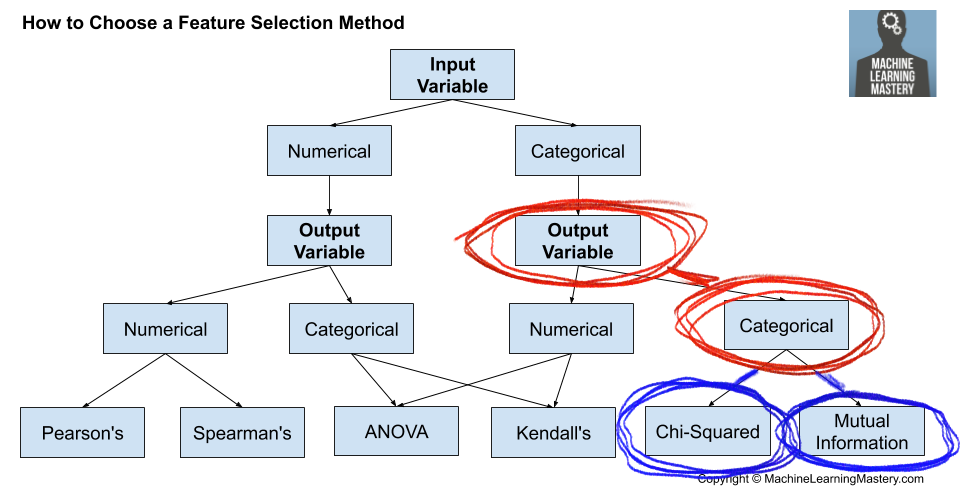

### <span style="font-size: 150%;color:#ffff00;background:#000000">Mutual Information</span> <span style="font-size: 110%;color:#cfe2f3;background:#1155cc"> Mutual Information Feature Selection: Mutual_info_classif()

Mmutual Information is usually used in the construction of decision trees for selecting variables.

In [21]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest


def select_features_MIC(X_train, y_train, X_test):
    MIC = SelectKBest(score_func=mutual_info_classif, k='all')
    MIC.fit(X_train, y_train)
    X_train_MIC = MIC.transform(X_train)
    X_test_MIC = MIC.transform(X_test)
    return X_train_MIC, X_test_MIC, MIC

In [22]:
X_train_MIC, X_test_MIC, MIC = select_features_MIC(X_train, y_train, X_test)

In [23]:
for i in range(len(MIC.scores_)):
    r = MIC.scores_[i]
    if r>0:
        print('Feature %d: %f' % (i, MIC.scores_[i]))

Feature 0: 0.207291
Feature 1: 0.549938
Feature 2: 0.028807
Feature 3: 0.252481
Feature 4: 0.202486
Feature 5: 0.204018
Feature 6: 0.013008
Feature 7: 0.001694
Feature 8: 0.003967
Feature 9: 0.039377
Feature 10: 0.019790
Feature 11: 0.135876
Feature 12: 0.305154
Feature 13: 0.007994
Feature 14: 0.012463
Feature 15: 0.430124
Feature 16: 0.399177
Feature 17: 0.013169
Feature 18: 0.013501
Feature 19: 0.010591
Feature 20: 0.005659
Feature 21: 0.004646
Feature 22: 0.218859
Feature 23: 0.428893
Feature 24: 0.016268
Feature 25: 0.017699
Feature 26: 0.020271
Feature 27: 0.017763
Feature 28: 0.024451
Feature 29: 0.066905
Feature 30: 0.004719
Feature 31: 0.013171


In [24]:
importance_mic = np.round(MIC.scores_, decimals=3)
importance_mic

array([0.207, 0.55 , 0.029, 0.252, 0.202, 0.204, 0.013, 0.002, 0.004,
       0.039, 0.02 , 0.136, 0.305, 0.008, 0.012, 0.43 , 0.399, 0.013,
       0.014, 0.011, 0.006, 0.005, 0.219, 0.429, 0.016, 0.018, 0.02 ,
       0.018, 0.024, 0.067, 0.005, 0.013])

In [25]:
KOT_MIC = dict(zip(df2, importance_mic))
KOT_sorted_keys_MIC = sorted(KOT_MIC, key=KOT_MIC.get, reverse=True)

for r in KOT_sorted_keys_MIC:
    m = KOT_MIC[r]
    if m>0:
        print (r, KOT_MIC[r])   

class_of_worker 0.55
full_or_part_time_employment_stat 0.43
detailed_household_and_family_stat 0.429
capital_gains 0.399
sex 0.305
adjusted_gross_income 0.252
state_of_previous_residence 0.219
age 0.207
wage_per_hour 0.204
education 0.202
hispanic_Origin 0.136
live_in_this_house_1year_ ago 0.067
major_occupation_code 0.039
industry_code 0.029
migration_code_move_within_reg 0.024
mace 0.02
migration_code_change_in_msa 0.02
instance_weight 0.018
migration_code_change_in_reg 0.018
detailed_household_summary_in_household 0.016
divdends_from_stocks 0.014
enrolled_in_edu_inst_last_wk 0.013
capital_losses 0.013
num_persons_worked_for_employer 0.013
reason_for_unemployment 0.012
federal_income_tax_liability 0.011
member_of_a_labor_union 0.008
tax_filer_status 0.006
region_of_previous_residence 0.005
migration_prev_res_in_sunbelt 0.005
major_industry_code 0.004
marital_status 0.002


### <span style="font-size: 150%;color:#ffff00;background:#000000">Chi-Squared</span> <span style="font-size: 110%;color:#cfe2f3;background:#1155cc">Feature Selection by Chi-Squared

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features_CH2(X_train, y_train, X_test):
    CH2 = SelectKBest(score_func=chi2, k=4)
    CH2.fit(X_train, y_train)
    X_train_CH2 = CH2.transform(X_train)
    X_test_CH2 = CH2.transform(X_test)
    return X_train_CH2, X_test_CH2, CH2

In [27]:
X_train_CH2, X_test_CH2, CH2 = select_features_CH2(X_train, y_train, X_test)

In [28]:
for i in range(len(CH2.scores_)):
    r = CH2.scores_[i]
    if r>50:
        print('Feature %d: %f' % (i, CH2.scores_[i]))

Feature 0: 1719.770857
Feature 2: 109.408442
Feature 3: 8141.557883
Feature 4: 1978.697567
Feature 5: 343.573956
Feature 6: 54.092470
Feature 7: 2080.913802
Feature 8: 220.037565
Feature 9: 114.850357
Feature 11: 16991.344469
Feature 12: 4724.481486
Feature 15: 131957.252232
Feature 16: 15863.400125
Feature 17: 54.702543
Feature 22: 48932.259694
Feature 23: 48571.345743
Feature 24: 396.962633
Feature 25: 491.727806
Feature 26: 1569.676054
Feature 27: 368.495794
Feature 28: 4363.595010
Feature 29: 330.527999
Feature 31: 1552.722125


## <span style="color:green"> Sprawdzenie czy dobrze przyporządkował. Trzeba porównać nazwę poniżej z nazwą po zip.

In [29]:
df2.columns[3]

'adjusted_gross_income'

In [30]:
importance_CH2 = np.round(CH2.scores_, decimals=3)
importance_CH2

KOT_CH2 = dict(zip(df2, importance_CH2))
KOT_CH2_sorted_keys = sorted(KOT_CH2, key=KOT_CH2.get, reverse=True)

for r in KOT_CH2_sorted_keys:
    g = KOT_CH2[r]
    if g>50:
        print (KOT_CH2[r],r)

131957.252 full_or_part_time_employment_stat
48932.26 state_of_previous_residence
48571.346 detailed_household_and_family_stat
16991.344 hispanic_Origin
15863.4 capital_gains
8141.558 adjusted_gross_income
4724.481 sex
4363.595 migration_code_move_within_reg
2080.914 marital_status
1978.698 education
1719.771 age
1569.676 migration_code_change_in_msa
1552.722 num_persons_worked_for_employer
491.728 instance_weight
396.963 detailed_household_summary_in_household
368.496 migration_code_change_in_reg
343.574 wage_per_hour
330.528 live_in_this_house_1year_ ago
220.038 major_industry_code
114.85 major_occupation_code
109.408 industry_code
54.703 capital_losses
54.092 enrolled_in_edu_inst_last_wk


## Tworzę tabelkę podsumowującą: Chi-Squared i Mutual Information

In [31]:
feature_name = X_cat.columns

feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-Squared':importance_CH2, 'Mutual Information':importance_mic})
feature_selection_df["Rank_MIC"] = feature_selection_df["Mutual Information"].rank(method ='average')
feature_selection_df["Rank_CH2"] = feature_selection_df["Chi-Squared"].rank(method ='average') 
feature_selection_df

del feature_selection_df['Chi-Squared'] 
del feature_selection_df['Mutual Information'] 

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values('Total',ascending=False )
feature_selection_df.head(20)

,Feature,Rank_MIC,Rank_CH2,Total
15,state_of_previous_residence,31.0,32.0,63.0
23,num_persons_worked_for_employer,30.0,30.0,60.0
16,detailed_household_and_family_stat,29.0,28.0,57.0
22,migration_prev_res_in_sunbelt,26.0,31.0,57.0
3,marital_status,27.0,27.0,54.0
12,federal_income_tax_liability,28.0,26.0,54.0
11,full_or_part_time_employment_stat,22.0,29.0,51.0
0,class_of_worker,25.0,22.0,47.0
4,major_industry_code,23.0,23.0,46.0
28,country_of_birth_self,18.0,25.0,43.0


Sprawdzam liczebność zbioru:

In [32]:
feature_selection_df.shape ##<-- wyszła jedna zmienna 'Target'

(32, 4)

# Feature Selection Techniques (by filter methods): numerical_ input, categorical output

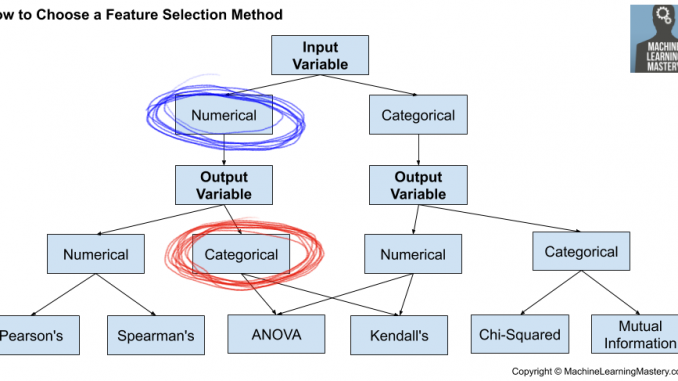

### <span style="color:purple"> Wydzielam zmienne numeryczne

Muszę dodać zmienną kategoryczną 'TARGET' bo jest to zmienna wynikowa (mimo, że jest to zmienna dyskretna).

In [33]:
num_c = df2.columns[numerical_fun]

df_num= df2[num_c]

df_num[result] = df2[result]
df_num.head(3)

,age,industry_code,adjusted_gross_income,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,detailed_household_summary_in_household,own_business_or_self_employed,total_person_income
26938,59,41,23,1200,0,0,0,2473.90,52,2
13699,33,25,42,0,0,0,0,1764.11,0,2
166169,78,0,0,0,0,0,0,965.50,0,2


In [34]:
X_num = df_num.drop(result, axis=1)
y = df_num[result]

### <span style="font-size: 150%;color:#ffff00;background:#000000">OLS</span> <span style="font-size: 110%;color:#cfe2f3;background:#1155cc">Redukcja zmiennych niezależnych za pomocą OLS

In [35]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X_num))
model_fit = model.fit()

print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     total_person_income   R-squared:                       0.646
Model:                             OLS   Adj. R-squared:                  0.646
Method:                  Least Squares   F-statistic:                 2.026e+04
Date:                 Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                         20:53:35   Log-Likelihood:                -73588.
No. Observations:                99762   AIC:                         1.472e+05
Df Residuals:                    99752   BIC:                         1.473e+05
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Wyodrębniam z powyższego zestawienia tabelę z 'P>|t|'

In [36]:
p_values = model_fit.summary2().tables[1]['P>|t|']

Obrabiam tą tabelę, zaokrąglam itp.

In [37]:
p_values = np.round(p_values, decimals=2)
p_values= p_values.sort_values(ascending=True)

p_values = p_values.to_frame()
print(p_values.shape)

p_values[p_values['P>|t|']<=0.01]   #<--wartości p-value mniejsze i równe 0.01

(10, 1)


,P>|t|
const,0.0
age,0.0
industry_code,0.0
adjusted_gross_income,0.0
capital_gains,0.0
divdends_from_stocks,0.0
detailed_household_summary_in_household,0.0
own_business_or_self_employed,0.0


Dodaje ranking ważności (odwrotny - najlepsze są te gdzie p-value<0.01).

In [38]:
p_values.drop('const', axis=0, inplace=True)

In [39]:
p_values["p-value_rank"] = p_values["P>|t|"].rank(method ='min',ascending=False) 
p_values.head(5)

,P>|t|,p-value_rank
age,0.0,3.0
industry_code,0.0,3.0
adjusted_gross_income,0.0,3.0
capital_gains,0.0,3.0
divdends_from_stocks,0.0,3.0


 Mnożę razy dwa ponieważ dla zmiennych kategorycznych mam dwa testy a dla zmiennych numerycznych mam jeden test. Chodzi o wyrównanie szans.

### <span style="font-size: 150%;color:white;background:red">Tu można wstawić procesor, który będzie pokazywał proporcje pomiędzy zmiennymi numerycznymi i dyskretnymi

In [40]:
del p_values['P>|t|'] 
p_values['p-value_x2'] = p_values['p-value_rank']*2
del p_values['p-value_rank'] 
p_values.head(3)

,p-value_x2
age,6.0
industry_code,6.0
adjusted_gross_income,6.0


In [41]:
feature_selection_df=feature_selection_df.set_index('Feature')

In [42]:
del feature_selection_df['Total']

In [43]:
feature_selection_df.shape

(32, 2)

In [44]:
p_values.shape

(9, 1)

### <span style="color:red"> Trzeba tu zrobić procentowo do udziału w całej populacji.

In [45]:
df6 = pd.concat([p_values,feature_selection_df], sort=True)
df6

,Rank_CH2,Rank_MIC,p-value_x2
age,NaN,NaN,6.0
industry_code,NaN,NaN,6.0
adjusted_gross_income,NaN,NaN,6.0
capital_gains,NaN,NaN,6.0
divdends_from_stocks,NaN,NaN,6.0
detailed_household_summary_in_household,NaN,NaN,6.0
own_business_or_self_employed,NaN,NaN,6.0
wage_per_hour,NaN,NaN,4.0
capital_losses,NaN,NaN,2.0
state_of_previous_residence,32.0,31.0,NaN


In [46]:
print('columns: ',df6.columns)
print(df6.shape)

columns:  Index(['Rank_CH2', 'Rank_MIC', 'p-value_x2'], dtype='object')
(41, 3)


### <span style="font-size: 150%;color:white;background:brown">Wrapper Method</span> <span style="font-size: 110%;color:#cfe2f3;background:#1155cc">Feature Selection Techniques – Backward Elimination
    
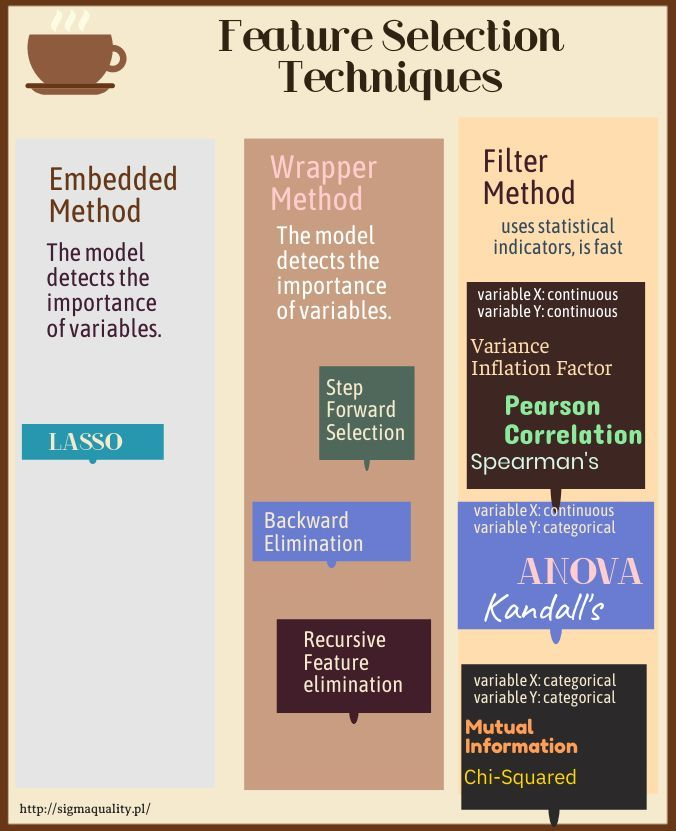

In [47]:
X = df2.drop(result, axis=1) 
y = df2[result]  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

 <span style="font-size: 150%;color:white;background:brown">Wrapper Method<span style="font-size: 150%;color:#ffff00;background:#000000">Recursive Feature Elimination (RFE)

Ustawiam liczbę zmiennych, które pozostaną w modelu

In [48]:
Num_v  =  15

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model=LinearRegression()
rfe=RFE(model,Num_v)

# Standaryzacja zmiennych

X_rfe = rfe.fit_transform(X,y)

model.fit(X_rfe,y)

print('Number of selected functions:  ',rfe.n_features_)
print()
print('The mask of selected features: ',rfe.support_)
print()
print('The feature ranking:',rfe.ranking_)
print()
print('The external estimator:',rfe.estimator_)

Number of selected functions:   15

The mask of selected features:  [False  True False False  True False  True  True False False  True False
 False  True False  True False False False False False False  True  True
 False  True False False  True False  True  True False False False False
 False  True False  True False]

The feature ranking: [ 5  1 15 13  1 25  1  1 22 19  1 10  6  1 16  1 26 23 27  2 12 18  1  1
 24  1  7  8  1 11  1  1 17 21 20  4  3  1  9  1 14]

The external estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#### Metoda zip na wyświetlenie rankingu cech

In [50]:
PPS = rfe.ranking_

KOT_MIC = dict(zip(df, PPS))
KOT_sorted_keys_MIC = sorted(KOT_MIC, key=KOT_MIC.get, reverse=True)

for r in KOT_sorted_keys_MIC:
    print (r, KOT_MIC[r])

divdends_from_stocks 27
capital_gains 26
wage_per_hour 25
detailed_household_summary_in_household 24
capital_losses 23
major_industry_code 22
total_person_earnings 21
country_of_birth_father 20
major_occupation_code 19
region_of_previous_residence 18
family_members_under_18 17
reason_for_unemployment 16
industry_code 15
taxable_income_amount 14
adjusted_gross_income 13
tax_filer_status 12
live_in_this_house_1year_ ago 11
hispanic_Origin 10
total_person_income 9
migration_code_change_in_reg 8
migration_code_change_in_msa 7
sex 6
age 5
country_of_birth_mother 4
country_of_birth_self 3
federal_income_tax_liability 2
class_of_worker 1
education 1
enrolled_in_edu_inst_last_wk 1
marital_status 1
mace 1
member_of_a_labor_union 1
full_or_part_time_employment_stat 1
state_of_previous_residence 1
detailed_household_and_family_stat 1
instance_weight 1
migration_code_move_within_reg 1
migration_prev_res_in_sunbelt 1
num_persons_worked_for_employer 1
citizenship 1
own_business_or_self_employed 1


 ## <span style="font-size: 150%;color:white;background:#0b5394">Embedded Method<span style="font-size: 150%;color:#ffff00;background:#000000">Lasso

In [51]:
Num_v = 15

In [52]:
from sklearn import linear_model

#rlasso = RandomizedLasso(alpha=0.025)

# Standaryzacja zmiennych

lasso = linear_model.Lasso(alpha=0.1, positive=True)
lasso.fit(X, y)


#print(lasso.coef_)
#print()
#print(lasso.intercept_)
#print()
#print(lasso.score(X,y))

lasso = lasso.coef_

Metoda zip na wyświetlenie ocen cechy

In [53]:
PPS = lasso

#PPS = np.round(PPS, decimals=8)

KOT_lasso = dict(zip(df, PPS))
KOT_sorted_keys_lasso = sorted(KOT_lasso, key=KOT_lasso.get, reverse=True)


for r in KOT_sorted_keys_lasso:
    print (r, (KOT_lasso[r]))

num_persons_worked_for_employer 0.18928798562232466
age 0.013621844401328801
adjusted_gross_income 0.006522879696980113
full_or_part_time_employment_stat 0.005633340770641473
industry_code 0.004667777887611731
total_person_income 0.003790664197140816
state_of_previous_residence 0.0020976740835124967
detailed_household_summary_in_household 1.2555251720289436e-05
capital_losses 8.088636112789062e-06
class_of_worker 0.0
education 0.0
wage_per_hour 0.0
enrolled_in_edu_inst_last_wk 0.0
marital_status 0.0
major_industry_code 0.0
major_occupation_code 0.0
mace 0.0
hispanic_Origin 0.0
sex 0.0
member_of_a_labor_union 0.0
reason_for_unemployment 0.0
capital_gains 0.0
divdends_from_stocks 0.0
federal_income_tax_liability 0.0
tax_filer_status 0.0
region_of_previous_residence 0.0
detailed_household_and_family_stat 0.0
instance_weight 0.0
migration_code_change_in_msa 0.0
migration_code_change_in_reg 0.0
migration_code_move_within_reg 0.0
live_in_this_house_1year_ ago 0.0
migration_prev_res_in_sunbel

##  <span style="font-size: 150%;color:white;background:#073763">RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
importance_RFC = rfc.feature_importances_

In [56]:
importance_RFC = np.round(importance_RFC, decimals=3)
importance_RFC

array([0.284, 0.01 , 0.034, 0.022, 0.078, 0.   , 0.012, 0.019, 0.005,
       0.005, 0.   , 0.   , 0.   , 0.001, 0.   , 0.022, 0.   , 0.   ,
       0.002, 0.011, 0.   , 0.   , 0.147, 0.077, 0.002, 0.001, 0.001,
       0.003, 0.001, 0.   , 0.044, 0.146, 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.043, 0.028, 0.   , 0.   ])

In [57]:
KOT = dict(zip(X, importance_RFC))
KOT_sorted_keys = sorted(KOT, key=KOT.get, reverse=True)

for r in KOT_sorted_keys:
    print (r, KOT[r])

    KOT

age 0.284
state_of_previous_residence 0.147
num_persons_worked_for_employer 0.146
education 0.078
detailed_household_and_family_stat 0.077
migration_prev_res_in_sunbelt 0.044
citizenship 0.043
industry_code 0.034
own_business_or_self_employed 0.028
adjusted_gross_income 0.022
full_or_part_time_employment_stat 0.022
marital_status 0.019
enrolled_in_edu_inst_last_wk 0.012
federal_income_tax_liability 0.011
class_of_worker 0.01
major_industry_code 0.005
major_occupation_code 0.005
migration_code_change_in_reg 0.003
divdends_from_stocks 0.002
detailed_household_summary_in_household 0.002
member_of_a_labor_union 0.001
instance_weight 0.001
migration_code_change_in_msa 0.001
migration_code_move_within_reg 0.001
country_of_birth_self 0.001
wage_per_hour 0.0
mace 0.0
hispanic_Origin 0.0
sex 0.0
reason_for_unemployment 0.0
capital_gains 0.0
capital_losses 0.0
tax_filer_status 0.0
region_of_previous_residence 0.0
live_in_this_house_1year_ ago 0.0
family_members_under_18 0.0
total_person_earnings

##  <span style="font-size: 150%;color:white;background:#20124d"> CatBoostClasiffier

In [58]:
## Potrzebujemy listy z numerami kolumn kategorycznych dla CatBoost

import numpy as np
a,b = df2.shape     #<- ile mamy kolumn
b

print()
cat_fun = np.where((df.dtypes == np.object))[0]    #|(df2.nunique() <= 3)
x1 = len(cat_fun)
print('cat_fun: ',x1)
print('cat_fun: ',cat_fun)


cat_fun:  29
cat_fun:  [ 1  4  6  7  8  9 10 11 12 13 14 15 19 20 21 22 23 25 26 27 28 29 31 32
 33 34 35 37 41]


Użycie modelu w celu wskazania najlepszych cech

# <span style="font-size: 150%;color:white;background:#073763"> Zestawienie informacji z modeli
Sprawdzenie wymiarów:

In [59]:
feature_name = X.columns
print('feature_name:                      ',feature_name.shape)
print('RandomForestClassifier_RFC:        ',importance_RFC.shape)
print('Recursive Feature Elimination_RFE: ',rfe.ranking_.shape)
print('lasso:                             ',lasso.shape)
#print('CatBoostClassifier:                ',feature_importances.shape)


feature_name:                       (41,)
RandomForestClassifier_RFC:         (41,)
Recursive Feature Elimination_RFE:  (41,)
lasso:                              (41,)


## Tworzymy tabelę porównawczą modeli:

In [60]:
feat_sel_df = pd.DataFrame({'Feature':feature_name, 'RandomForestClassifier':importance_RFC, 'Recursive Feature Elimination (RFE)':rfe.ranking_,'lasso':lasso})  #,'CatBoostClassifier':feature_importances

In [61]:
feat_sel_df.head(3)

,Feature,RandomForestClassifier,Recursive Feature Elimination (RFE),lasso
0,age,0.284,5,0.013622
1,class_of_worker,0.010,1,0.000000
2,industry_code,0.034,15,0.004668


Jak widać oceny są niekompatibilne do siebie dlatego zrobiłem ocenę rankingową

### Tworzymy tabelę rankingową dla Wrapper Method

In [62]:
feat_sel_df["RFC"] = feat_sel_df["RandomForestClassifier"].rank(method ='average')
feat_sel_df["RFE"] = feat_sel_df["Recursive Feature Elimination (RFE)"].rank(method ='average')
feat_sel_df["Lasso"] = feat_sel_df["lasso"].rank(method ='average')
#feat_sel_df["CBC"] = feat_sel_df["CatBoostClassifier"].rank(method ='average')

del feat_sel_df['RandomForestClassifier'] 
del feat_sel_df['Recursive Feature Elimination (RFE)'] 
del feat_sel_df['lasso'] 
#del feat_sel_df['CatBoostClassifier']

In [63]:
feat_sel_df['Total'] = feat_sel_df['RFC']+feat_sel_df['RFE']+feat_sel_df['Lasso']
feat_sel_df = feat_sel_df.sort_values('Total',ascending=False )
feat_sel_df.head(20)

,Feature,RFC,RFE,Lasso,Total
0,age,41.0,19.0,40.0,100.0
2,industry_code,34.0,29.0,37.0,100.0
3,adjusted_gross_income,31.5,27.0,39.0,97.5
24,detailed_household_summary_in_household,22.5,38.0,34.0,94.5
38,own_business_or_self_employed,33.0,23.0,36.0,92.0
31,num_persons_worked_for_employer,39.0,8.0,41.0,88.0
22,state_of_previous_residence,40.0,8.0,35.0,83.0
18,divdends_from_stocks,22.5,41.0,16.5,80.0
17,capital_losses,8.5,37.0,33.0,78.5
8,major_industry_code,25.5,36.0,16.5,78.0


In [64]:
del feat_sel_df['Total']  # <- usuwam podsumowanie 'Total'

#### Ustawiamy indeks 'Feature' w tabeli Filtrów

In [65]:
print(df6.shape)   ## obie tabele filtrów i modeli muszą mieć tyle samo wierszy!
print(df6.index)
df6.reset_index()

(41, 3)
Index(['age', 'industry_code', 'adjusted_gross_income', 'capital_gains',
       'divdends_from_stocks', 'detailed_household_summary_in_household',
       'own_business_or_self_employed', 'wage_per_hour', 'capital_losses',
       'state_of_previous_residence', 'num_persons_worked_for_employer',
       'detailed_household_and_family_stat', 'migration_prev_res_in_sunbelt',
       'marital_status', 'federal_income_tax_liability',
       'full_or_part_time_employment_stat', 'class_of_worker',
       'major_industry_code', 'country_of_birth_self', 'major_occupation_code',
       'education', 'country_of_birth_father', 'citizenship',
       'total_person_earnings', 'member_of_a_labor_union',
       'country_of_birth_mother', 'enrolled_in_edu_inst_last_wk',
       'family_members_under_18', 'fill_inc_questionnaire_for_veterans_admin',
       'hispanic_Origin', 'instance_weight', 'migration_code_change_in_msa',
       'mace', 'reason_for_unemployment', 'sex',
       'migration_code_chan

,index,Rank_CH2,Rank_MIC,p-value_x2
0,age,NaN,NaN,6.0
1,industry_code,NaN,NaN,6.0
2,adjusted_gross_income,NaN,NaN,6.0
3,capital_gains,NaN,NaN,6.0
4,divdends_from_stocks,NaN,NaN,6.0
5,detailed_household_summary_in_household,NaN,NaN,6.0
6,own_business_or_self_employed,NaN,NaN,6.0
7,wage_per_hour,NaN,NaN,4.0
8,capital_losses,NaN,NaN,2.0
9,state_of_previous_residence,32.0,31.0,NaN


#### Ustawiamy indeks 'Feature' w tabeli Wrapper Method (kolanem dopychamy)

In [66]:
feat_sel_df.reset_index()
feat_sel_df= feat_sel_df.set_index('Feature')
print(feat_sel_df.shape)
print(feat_sel_df.index)
print(feat_sel_df.columns)

(41, 3)
Index(['age', 'industry_code', 'adjusted_gross_income',
       'detailed_household_summary_in_household',
       'own_business_or_self_employed', 'num_persons_worked_for_employer',
       'state_of_previous_residence', 'divdends_from_stocks', 'capital_losses',
       'major_industry_code', 'full_or_part_time_employment_stat',
       'major_occupation_code', 'capital_gains', 'wage_per_hour',
       'migration_code_change_in_reg', 'education',
       'detailed_household_and_family_stat', 'migration_prev_res_in_sunbelt',
       'federal_income_tax_liability', 'total_person_earnings', 'citizenship',
       'country_of_birth_father', 'region_of_previous_residence',
       'migration_code_change_in_msa', 'family_members_under_18',
       'reason_for_unemployment', 'marital_status',
       'enrolled_in_edu_inst_last_wk',
       'fill_inc_questionnaire_for_veterans_admin', 'country_of_birth_self',
       'class_of_worker', 'tax_filer_status', 'live_in_this_house_1year_ ago',
       'hi

### Tworzenie wspólnej tabeli Filters + Wrapper Method

In [67]:
NOWA = pd.merge(feat_sel_df,df6, how='inner', left_index=True, right_index=True)

NOWA['Total'] = np.sum(NOWA, axis=1)
NOWA = NOWA.sort_values('Total',ascending=False )
NOWA.head(40)

,RFC,RFE,Lasso,Rank_CH2,Rank_MIC,p-value_x2,Total
num_persons_worked_for_employer,39.0,8.0,41.0,30.0,30.0,NaN,148.0
state_of_previous_residence,40.0,8.0,35.0,32.0,31.0,NaN,146.0
full_or_part_time_employment_stat,31.5,8.0,38.0,29.0,22.0,NaN,128.5
major_industry_code,25.5,36.0,16.5,23.0,23.0,NaN,124.0
detailed_household_and_family_stat,37.0,8.0,16.5,28.0,29.0,NaN,118.5
migration_prev_res_in_sunbelt,36.0,8.0,16.5,31.0,26.0,NaN,117.5
major_occupation_code,25.5,33.0,16.5,16.0,24.0,NaN,115.0
federal_income_tax_liability,28.0,16.0,16.5,26.0,28.0,NaN,114.5
marital_status,30.0,8.0,16.5,27.0,27.0,NaN,108.5
industry_code,34.0,29.0,37.0,NaN,NaN,6.0,106.0


In [68]:
df2.shape

(99762, 42)

### Wybieram 20 najlepszych zmiennych i tworze z nich bazę dla modeli '20'

In [69]:
columns20 = NOWA.index[:20]
columns20

Index(['num_persons_worked_for_employer', 'state_of_previous_residence',
       'full_or_part_time_employment_stat', 'major_industry_code',
       'detailed_household_and_family_stat', 'migration_prev_res_in_sunbelt',
       'major_occupation_code', 'federal_income_tax_liability',
       'marital_status', 'industry_code', 'age', 'adjusted_gross_income',
       'education', 'detailed_household_summary_in_household',
       'class_of_worker', 'own_business_or_self_employed',
       'country_of_birth_father', 'country_of_birth_self', 'citizenship',
       'total_person_earnings'],
      dtype='object')

Dołączam zmienną wynikową:

In [70]:
df20 = df2[columns20]

## Dołączam kolumnę wynikową
df19 = df2[result]

df20 = pd.merge(df19,df20, how='inner', left_index=True, right_index=True)

print(df20.shape)
print(df20.columns)

(99762, 21)
Index(['total_person_income', 'num_persons_worked_for_employer',
       'state_of_previous_residence', 'full_or_part_time_employment_stat',
       'major_industry_code', 'detailed_household_and_family_stat',
       'migration_prev_res_in_sunbelt', 'major_occupation_code',
       'federal_income_tax_liability', 'marital_status', 'industry_code',
       'age', 'adjusted_gross_income', 'education',
       'detailed_household_summary_in_household', 'class_of_worker',
       'own_business_or_self_employed', 'country_of_birth_father',
       'country_of_birth_self', 'citizenship', 'total_person_earnings'],
      dtype='object')


Zapisuje bazę '20' dla modeli:

In [71]:
df20.to_csv('/home/wojciech/Pulpit/7/RESULT_20.csv')

### Wybieram 40 najlepszych zmiennych i tworze z nich bazę dla modeli '40'

In [72]:
columns40 = NOWA.index[:40]
columns40

Index(['num_persons_worked_for_employer', 'state_of_previous_residence',
       'full_or_part_time_employment_stat', 'major_industry_code',
       'detailed_household_and_family_stat', 'migration_prev_res_in_sunbelt',
       'major_occupation_code', 'federal_income_tax_liability',
       'marital_status', 'industry_code', 'age', 'adjusted_gross_income',
       'education', 'detailed_household_summary_in_household',
       'class_of_worker', 'own_business_or_self_employed',
       'country_of_birth_father', 'country_of_birth_self', 'citizenship',
       'total_person_earnings', 'family_members_under_18',
       'divdends_from_stocks', 'enrolled_in_edu_inst_last_wk',
       'fill_inc_questionnaire_for_veterans_admin', 'capital_losses',
       'migration_code_change_in_reg', 'migration_code_change_in_msa',
       'member_of_a_labor_union', 'reason_for_unemployment',
       'country_of_birth_mother', 'hispanic_Origin', 'capital_gains',
       'region_of_previous_residence', 'wage_per_hour'

In [73]:
df40 = df2[columns40]

## Dołączam kolumnę wynikową
df19 = df2[result]

df40 = pd.merge(df19,df40, how='inner', left_index=True, right_index=True)

print(df40.shape)
print(df40.columns)

(99762, 41)
Index(['total_person_income', 'num_persons_worked_for_employer',
       'state_of_previous_residence', 'full_or_part_time_employment_stat',
       'major_industry_code', 'detailed_household_and_family_stat',
       'migration_prev_res_in_sunbelt', 'major_occupation_code',
       'federal_income_tax_liability', 'marital_status', 'industry_code',
       'age', 'adjusted_gross_income', 'education',
       'detailed_household_summary_in_household', 'class_of_worker',
       'own_business_or_self_employed', 'country_of_birth_father',
       'country_of_birth_self', 'citizenship', 'total_person_earnings',
       'family_members_under_18', 'divdends_from_stocks',
       'enrolled_in_edu_inst_last_wk',
       'fill_inc_questionnaire_for_veterans_admin', 'capital_losses',
       'migration_code_change_in_reg', 'migration_code_change_in_msa',
       'member_of_a_labor_union', 'reason_for_unemployment',
       'country_of_birth_mother', 'hispanic_Origin', 'capital_gains',
       'regi

Zapisuje bazę '40' dla modeli:

In [74]:
df40.to_csv('/home/wojciech/Pulpit/7/Result40.csv')

### Wybieram 10 najlepszych zmiennych i tworze z nich bazę dla modeli '10'

In [75]:
columns10 = NOWA.index[:10]
columns10

Index(['num_persons_worked_for_employer', 'state_of_previous_residence',
       'full_or_part_time_employment_stat', 'major_industry_code',
       'detailed_household_and_family_stat', 'migration_prev_res_in_sunbelt',
       'major_occupation_code', 'federal_income_tax_liability',
       'marital_status', 'industry_code'],
      dtype='object')

In [76]:
df10 = df2[columns10]

## Dołączam kolumnę wynikową
df19 = df2[result]

df10 = pd.merge(df19,df10, how='inner', left_index=True, right_index=True)

print(df10.shape)
print(df10.columns)

(99762, 11)
Index(['total_person_income', 'num_persons_worked_for_employer',
       'state_of_previous_residence', 'full_or_part_time_employment_stat',
       'major_industry_code', 'detailed_household_and_family_stat',
       'migration_prev_res_in_sunbelt', 'major_occupation_code',
       'federal_income_tax_liability', 'marital_status', 'industry_code'],
      dtype='object')


Zapisuje bazę '10' dla modeli:

In [77]:
df10.to_csv('/home/wojciech/Pulpit/7/Result10.csv')